In [1]:
from icecube import dataio,dataclasses
import matplotlib.pyplot as plt
import numpy as np

(0.001, 1000)

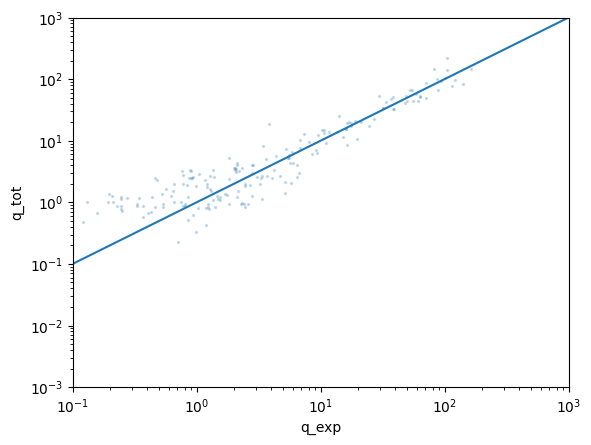

In [3]:
f = dataio.I3File('/home/storage/hans/jax_reco_new/extract_data_from_i3files/test.i3.zst')
frame = f.pop_physics()
expq_dict = frame['MCMostEnergeticTrack_I3MCTree_ExQ']
pulses = dataclasses.I3RecoPulseSeriesMap.from_frame(frame, "TWSRTHVInIcePulsesIC")

qexp_list = []
qtot_list = []
for key in pulses.keys():
    qtot = sum([p.charge for p in pulses[key]])
    qexp = sum(expq_dict[key])
    qexp_list.append(qexp)
    qtot_list.append(qtot)


fig, ax = plt.subplots()
plt.scatter(qexp_list, qtot_list, s=2, alpha=0.2)
plt.plot([0.001, 1000], [0.001, 1000])
plt.xlabel('q_exp')
plt.ylabel('q_tot')
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.1, 10**3])
plt.ylim([0.001, 10**3])

In [4]:
import numpy as np


In [8]:
xd = np.array([0., 1.])
x0 = np.array([0., 1.])
x1 = np.array([1., -1.])

x2 = x1-x0
x2 = x2 / np.linalg.norm(x2)
print(x2)

[ 0.4472136  -0.89442719]


In [9]:
np.dot(x2, xd)

-0.8944271909999159

In [11]:
np.rad2deg(np.arccos(np.dot(x2, xd)))

153.434948822922

In [13]:
I3MCTree = frame['I3MCTree']

sources = []
for p in I3MCTree.get_daughters(I3MCTree[0]):
     for loss in I3MCTree.get_daughters(p):
           if not 'Mu' in str(loss.type):
                 sources.append(loss)

print(len(sources))

345


In [ ]:
expq_dict = frame['MCMostEnergeticTrack_I3MCTree_ExQ']